In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from joblib import dump, load
from typing import List
from sklearn.ensemble import IsolationForest

In [3]:
train_df = pd.read_csv("../data/train.csv")
test_df = pd.read_csv("../data/test.csv")

In [4]:
clf = IsolationForest(random_state=16, contamination=0.001)

In [5]:
clf.fit(train_df)

IsolationForest(contamination=0.001, random_state=16)

# Plot Isolation Forest Results

Function for plotting decision boundary 

/usr/local/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


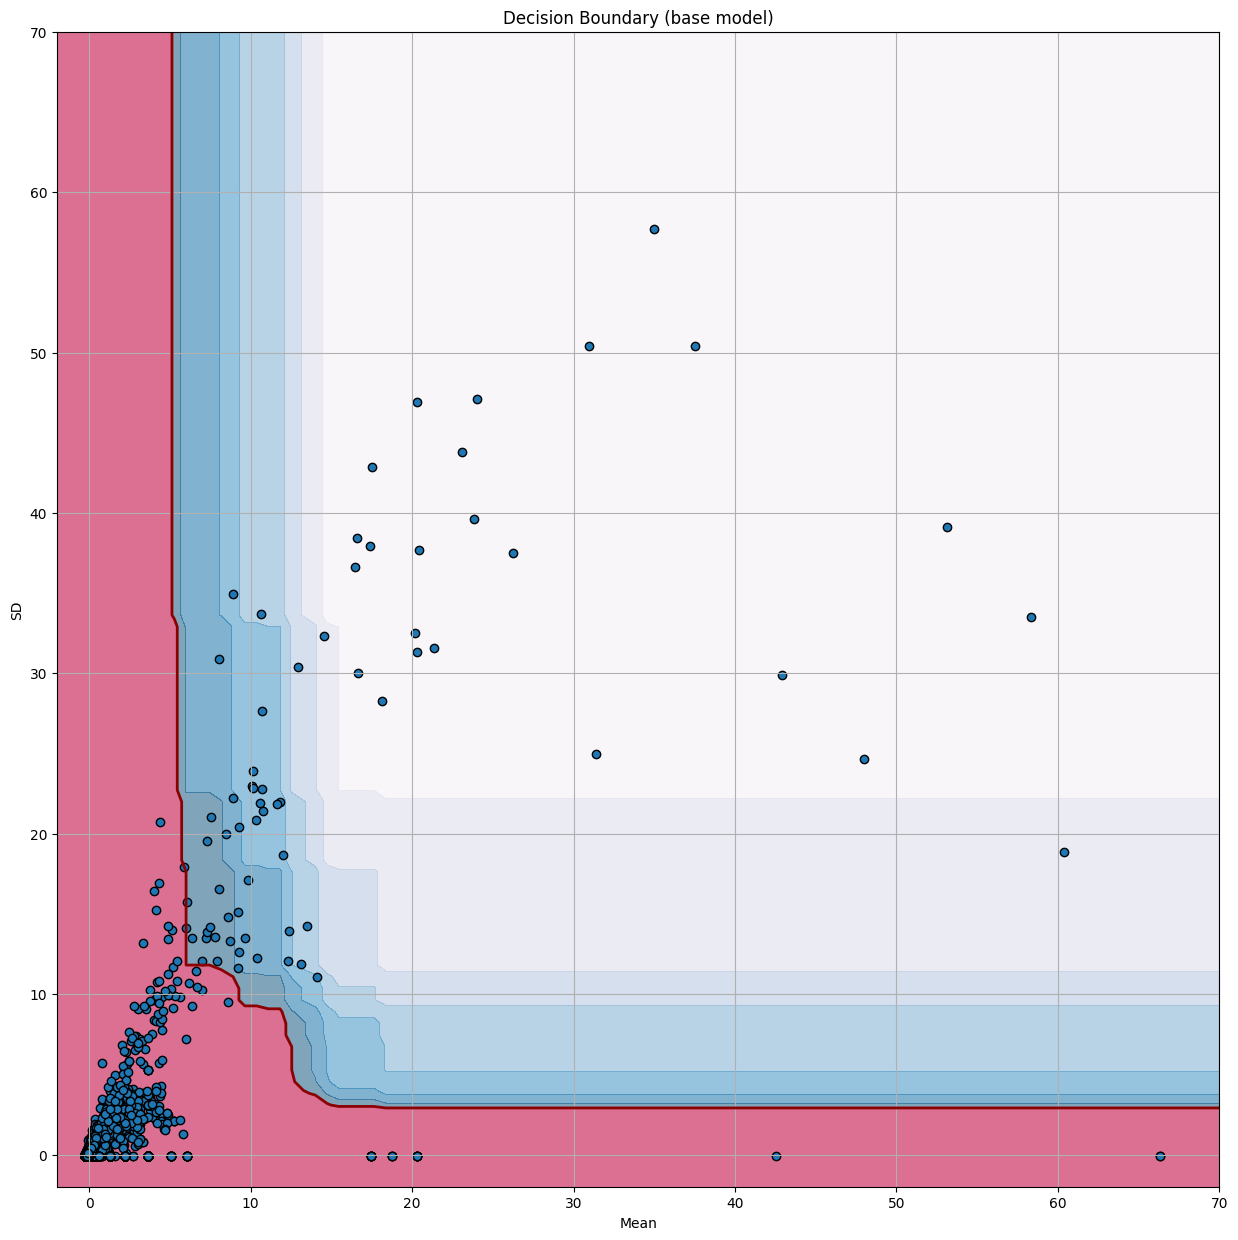

In [6]:
# Change the plot's size.
plt.rcParams['figure.figsize'] = [15, 15]

# Plot of the decision frontier
xx, yy = np.meshgrid(np.linspace(-2, 70, 100), np.linspace(-2, 70, 100))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.title("Decision Boundary (base model)")
# This draw the "soft" or secondary boundaries.
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 8), cmap=plt.cm.PuBu, alpha=0.5)
# This draw the line that separates the hard from the soft boundaries.
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
# This draw the hard boundary
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred')
plt.scatter(train_df.iloc[:, 0],
            train_df.iloc[:, 1],
            edgecolors='k')
plt.xlabel('Mean')
plt.ylabel('SD')
plt.grid(True)
plt.show()

In [7]:
test_predictions = clf.predict(test_df)
test_predictions

array([1, 1, 1, ..., 1, 1, 1])

In [8]:
X_test = pd.concat([test_df, pd.Series(data=test_predictions, name="prediction")], axis=1)
X_test.head()

,mean,sd,prediction
0,-0.157953,-0.106749,1
1,-0.157953,-0.106749,1
2,-0.157953,-0.106242,1
3,-0.284889,-0.106749,1
4,-0.157953,-0.106242,1


In [9]:
X_test_pos = X_test[X_test["prediction"] == 1]
X_test_neg = X_test[X_test["prediction"] == -1]

/usr/local/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


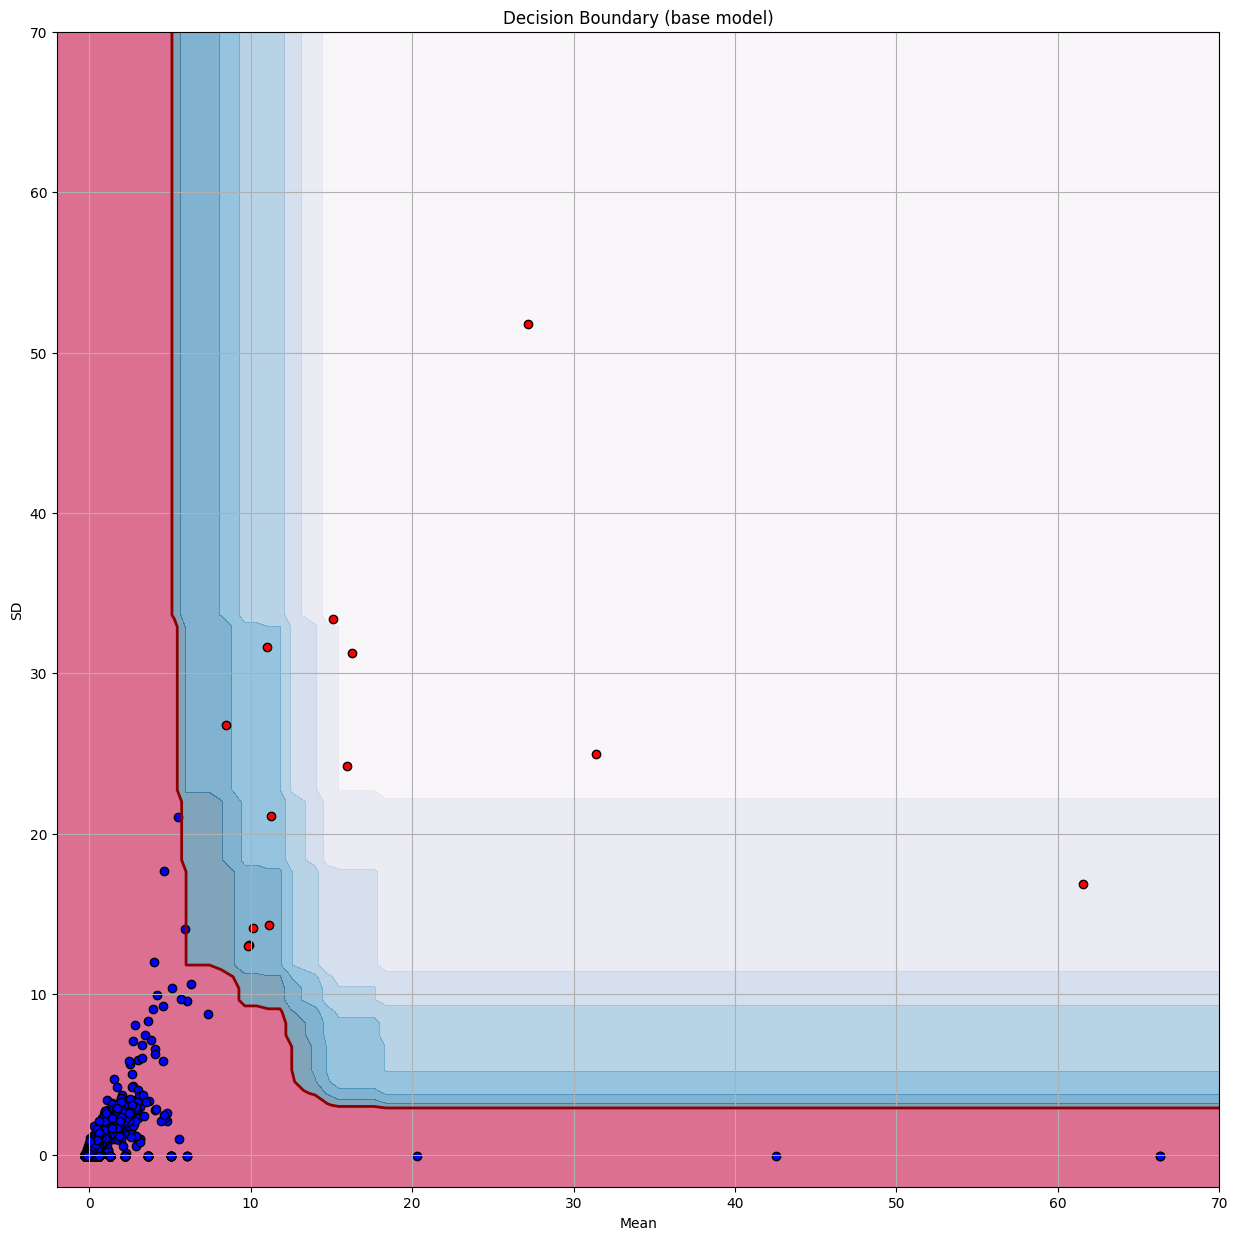

In [10]:
# Change the plot's size.
plt.rcParams['figure.figsize'] = [15, 15]

# Plot of the decision frontier
xx, yy = np.meshgrid(np.linspace(-2, 70, 100), np.linspace(-2, 70, 100))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.title("Decision Boundary (base model)")
# This draw the "soft" or secondary boundaries.
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 8), cmap=plt.cm.PuBu, alpha=0.5)
# This draw the line that separates the hard from the soft boundaries.
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
# This draw the hard boundary
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred')
plt.scatter(X_test_pos.iloc[:, 0],
            X_test_pos.iloc[:, 1],
            color="blue",
            edgecolors='k')

plt.scatter(X_test_neg.iloc[:, 0],
            X_test_neg.iloc[:, 1],
            color="red",
            edgecolors='k')
plt.xlabel('Mean')
plt.ylabel('SD')
plt.grid(True)
plt.show()

In [11]:
!mkdir models/

In [12]:
dump(clf, "../data/models/model.joblib")

['../data/models/model.joblib']

In [30]:
feature_vector: List[float] = [0.1, 0.1]
response = {
    "predict": clf.predict([feature_vector])[0],
    "anomaly_score": float(clf.score_samples([feature_vector])[0])
}

/usr/local/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [31]:
response

{'predict': 1, 'anomaly_score': -0.5868876415914397}